# Analysis of Foursquare Data Using Kmeans Clustering

In [ ]:
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%matplotlib inline
#import statsmodels.formula.api as smf
import itertools
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.metrics import silhouette_score

# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [186]:
data = gpd.read_file('NYU_March2018_subset30.geojson')

In [187]:
(list(data.columns))

['id',
 'Place Name',
 'Rating',
 'Checkins',
 'Users',
 'Visits',
 'Pricing',
 'Type',
 'Category',
 'Class',
 'geometry']

In [188]:
maps=gpd.read_file('udpny_2/Censustracts/total.shp')

In [189]:
maps.head()

,id,Place Name,Rating,Checkins,Users,Visits,Pricing,Type,Category,Class,...,moe_doctor,per_col_16,pop90,per_col90,moe_hu16,hinc16,moe_hinc16,popgrowth,Type_1.19,geometry
0,3fd66200f964a5202bea1ee3,Bar Six,7.5,7129.0,4556.0,7886.0,2.0,French Restaurant,Social,Optional,...,103,0.772135,6241.0,0.594715,63,127904,11686,418.0,MHI - Ongoing Exclusion,"POLYGON ((983477.0537245736 206553.0512004816,..."
1,3fd66200f964a520abe51ee3,Fiddlesticks Pub & Grill,6.1,23722.0,18806.0,28049.0,2.0,Bar,Social,Optional,...,103,0.772135,6241.0,0.594715,63,127904,11686,418.0,MHI - Ongoing Exclusion,"POLYGON ((983477.0537245736 206553.0512004816,..."
2,3fd66200f964a520d0e51ee3,Spain Restaurant,7.1,2095.0,2596.0,3949.0,1.0,Tapas Restaurant,Social,Optional,...,103,0.772135,6241.0,0.594715,63,127904,11686,418.0,MHI - Ongoing Exclusion,"POLYGON ((983477.0537245736 206553.0512004816,..."
3,3fd66200f964a520f2e61ee3,The Monster,7.8,10191.0,7352.0,14328.0,1.0,Gay Bar,Social,Optional,...,103,0.772135,6241.0,0.594715,63,127904,11686,418.0,MHI - Ongoing Exclusion,"POLYGON ((983477.0537245736 206553.0512004816,..."
4,4388f700f964a520182b1fe3,Joe,8.8,17312.0,9611.0,23679.0,1.0,Coffee Shop,Social,Optional,...,103,0.772135,6241.0,0.594715,63,127904,11686,418.0,MHI - Ongoing Exclusion,"POLYGON ((983477.0537245736 206553.0512004816,..."


In [190]:
maps['Type_1.19'].unique()

array(['MHI - Ongoing Exclusion', 'LI - At Risk of Gentrification',
       'MHI - Advanced Gentrification',
       'MHI - Stable or Early Stage of Exclusion', 'Missing Data',
       'LI - Ongoing Gentrification', 'MHI - Advanced Exclusion',
       'VHI - Super Gentrification or Exclusion',
       'LI - Ongoing Displacement of Low-Income Households',
       'LI - Not Losing Low-Income Households'], dtype=object)

In [191]:
maps['Type_1.19'][maps['Type_1.19']==7]
#455,516

Series([], Name: Type_1.19, dtype: object)

In [192]:
maps.shape

(7431, 107)

In [193]:
print(list(maps.columns))

['id', 'Place Name', 'Rating', 'Checkins', 'Users', 'Visits', 'Pricing', 'Type', 'Category', 'Class', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD', 'ALAND', 'AWATER', 'geo', 'GEOid2', 'hh16', 'moe_hh16', 'per_col00', 'per_nonwhi', 'per_rent00', 'vli2000', 'li2000', 'mi2000', 'hmi2000', 'hi2000', 'vhi2000', 'per_all_li', 'hh00', 'all_li_cou', 'per_nonw_1', 'per_rent90', 'vli1990', 'li1990', 'mi1990', 'hmi1990', 'hi1990', 'vhi1990', 'denominato', 'per_all__1', 'all_li_c_1', 'pop00', 'pop16', 'moe_pop16', 'ch_all_li_', 'ch_all_li1', 'moveinincd', 'co_med_ind', 'per_limove', 'per_limo_1', 'TOD', 'empd15', 'mrent90', 'rou90', 'mrent00', 'rou00', 'mrent16', 'moe_mrent1', 'mhval90', 'ohu90', 'mhval00', 'ohu00', 'mhval16', 'moe_mhval1', 'mhval90_00', 'mhval00_16', 'mrent90_00', 'mrent00_16', 'hu16', 'per_units_', 'ohu16', 'moe_owner1', 'rhu16', 'moe_renter', 'per_rent16', 'per_nonw_2', 'vli2016', 'li2016', 'mi2016', 'hmi2016', 'hi2016', 'vhi2016', 'per_all__2', 'all_li

In [194]:
types = maps.groupby('Type').count()[['id']].sort_values(ascending = False, by='id')

In [195]:
len(types)

142

In [196]:
category = maps.groupby('Category').count()[['id']].sort_values(ascending = False, by='id')

In [197]:
category.head()

,id
Category,
Social,4837
Nutrition,1884
Consumption,701
Leisure,9


In [198]:
plt.rcParams['figure.figsize'] = (30, 20)

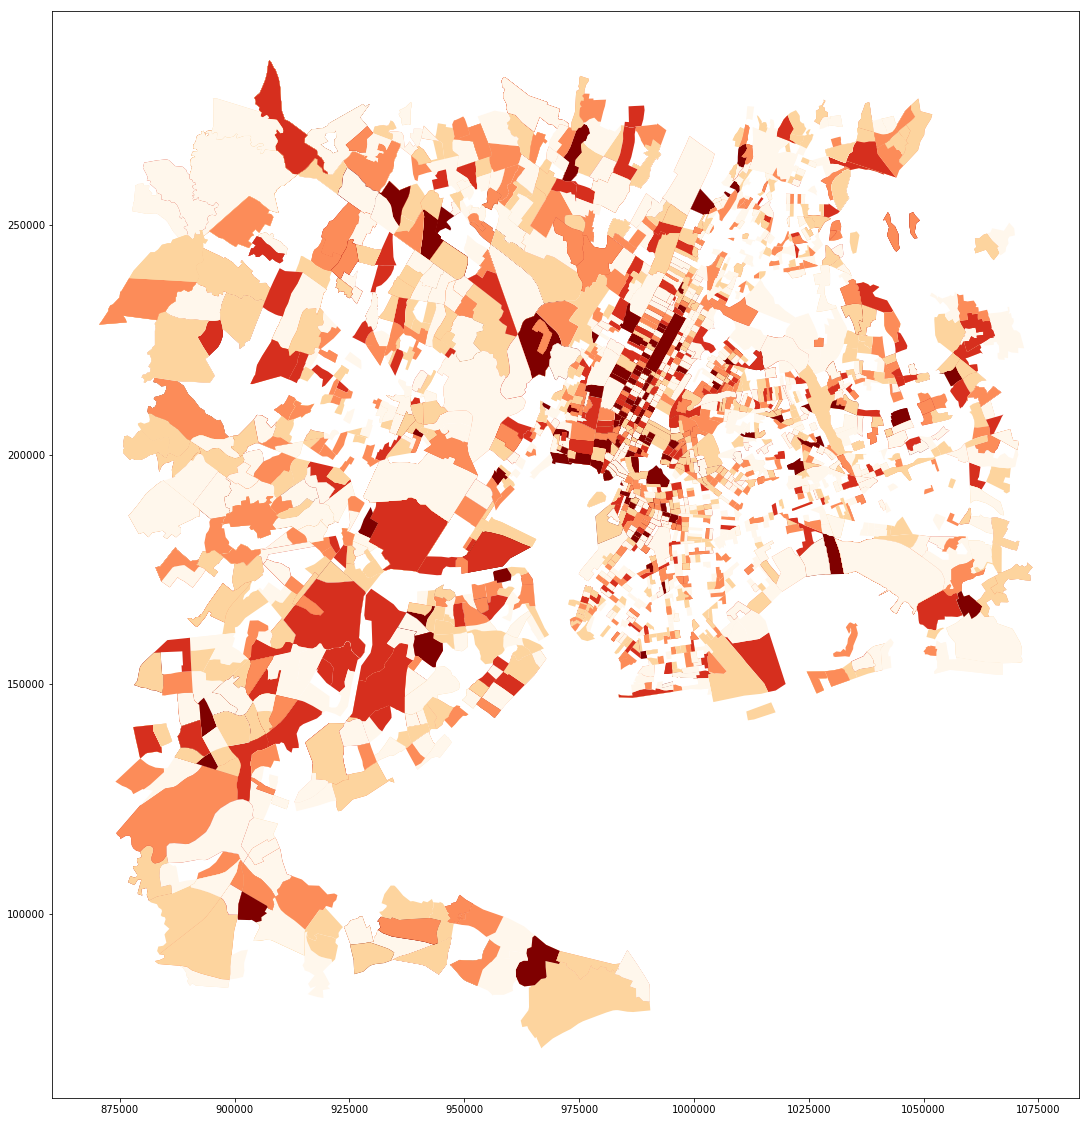

In [199]:
ax = maps.plot(column='Checkins', scheme='quantiles', cmap='OrRd')

#  Clustering

## 1. Cluster by Foursquare attributes

In [218]:
X = maps.iloc[:,2:10]
X.iloc[:,5:8].columns

Index(['Type', 'Category', 'Class'], dtype='object')

In [219]:
for column in X.iloc[:,5:8].columns:
    print(column)
    X[column] = pd.factorize(X[column])[0]
X.head(10)

Type
Category
Class


,Rating,Checkins,Users,Visits,Pricing,Type,Category,Class
0,7.5,7129.0,4556.0,7886.0,2.0,0,0,0
1,6.1,23722.0,18806.0,28049.0,2.0,1,0,0
2,7.1,2095.0,2596.0,3949.0,1.0,2,0,0
3,7.8,10191.0,7352.0,14328.0,1.0,3,0,0
4,8.8,17312.0,9611.0,23679.0,1.0,4,0,0
5,7.6,1364.0,783.0,1424.0,1.0,5,1,1
6,9.0,7004.0,5219.0,8322.0,3.0,6,0,0
7,9.4,17804.0,14305.0,25861.0,3.0,7,0,0
8,7.9,3429.0,3644.0,5060.0,3.0,8,0,0
9,7.3,449.0,476.0,722.0,1.0,9,0,0


# 2. Clustering by Census 

In [261]:
# vli	li	mi	mhi	hi	vhi	hinc	vli_mig	li_mig	mi_mig	mhi_mig	per_all_li_mig

income_columns = []
for column in maps.iloc[:,24:105].columns:
    if 'inc' in column:
        print(column)
        income_columns.append(column)
    elif 'mrent' in column:
        print(column)
        income_columns.append(column)
#     elif 'mi' in column:
#         print(column)
#         income_columns.append(column)
income_columns

moveinincd
mrent90
mrent00
mrent16
moe_mrent1
mrent90_00
mrent00_16
hinc16
moe_hinc16


['moveinincd',
 'mrent90',
 'mrent00',
 'mrent16',
 'moe_mrent1',
 'mrent90_00',
 'mrent00_16',
 'hinc16',
 'moe_hinc16']

In [263]:
maps['mrent16']

0       2117
1       2117
2       2117
3       2117
4       2117
5       2117
6       2117
7       2117
8       2117
9       2117
10      2117
11      2117
12      2117
13      2117
14      2117
15      2117
16      2117
17      2117
18       555
19      1762
20      1762
21      1762
22      1762
23      1762
24      1762
25      1762
26      1762
27      1762
28      1762
29      1762
        ... 
7400    1234
7401    1489
7402    1489
7403    1479
7404    1570
7405    1670
7406    1670
7407    1670
7408    1670
7409    1374
7410    1374
7411     954
7412    1432
7413    1418
7414    1476
7415    1033
7416    1532
7417    1127
7418    1066
7419     899
7420    1083
7421    1065
7422    1065
7423    1154
7424    1331
7425    1469
7426    1564
7427    1304
7428    1079
7429    1095
Name: mrent16, Length: 7117, dtype: int64

In [264]:
print(maps.shape)
maps= maps.replace(0,nan)
maps=maps.dropna(how='all',axis=0)
print(maps.shape)

(7117, 107)
(7117, 107)


In [267]:
maps.isnull().sum().sum()

0

In [268]:
maps = maps[~(maps[income_columns] == 0).any(axis=1)]

In [269]:
print(maps.shape)

(7117, 107)


In [270]:
X = maps[income_columns]

In [275]:
X.head(2)

,moveinincd,mrent90,mrent00,mrent16,moe_mrent1,mrent90_00,mrent00_16,hinc16,moe_hinc16
0,1108.77,660.999996,1198.0,2117,405,0.812405,0.767112,127904,11686
1,1108.77,660.999996,1198.0,2117,405,0.812405,0.767112,127904,11686


In [276]:
range_n_clusters = range(2,10)

for n_clusters in range_n_clusters:
    km = KMeans(n_clusters = n_clusters)
    res=km.fit(X)
    silhouette_avg = silhouette_score(X, res.labels_)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.5602033034517799
For n_clusters = 3, the average silhouette_score is : 0.5262162907600796
For n_clusters = 4, the average silhouette_score is : 0.4749345447834628
For n_clusters = 5, the average silhouette_score is : 0.4827194667436219
For n_clusters = 6, the average silhouette_score is : 0.4713603061228109
For n_clusters = 7, the average silhouette_score is : 0.43271103925665494
For n_clusters = 8, the average silhouette_score is : 0.42842939097750654
For n_clusters = 9, the average silhouette_score is : 0.41037242091163245


[4818782588656.6914, 2970750806993.3799, 2034137490988.897, 1490508143686.0771, 1076370885464.8909, 905594311454.6582, 782933081866.5658, 700014900847.3374]


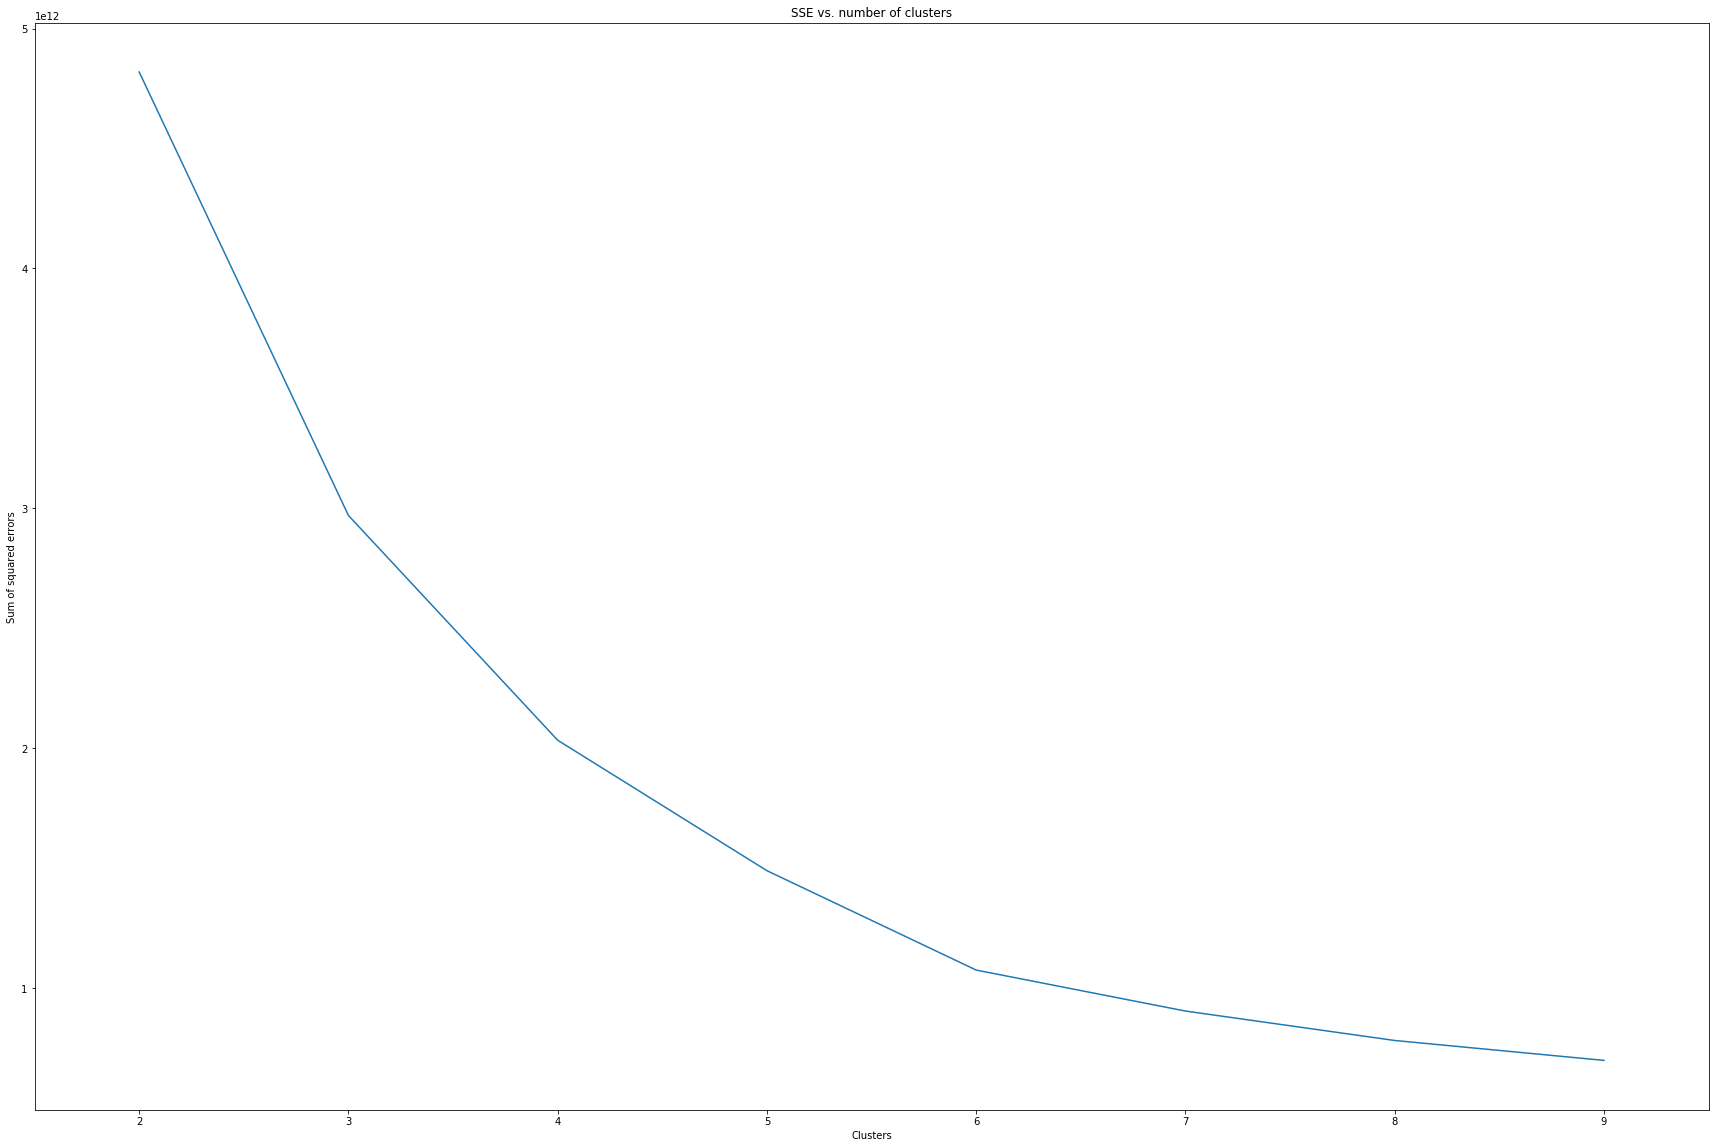

In [277]:
SSE = []
for i in range(2,10):
    km = KMeans(n_clusters = i)
    res=km.fit(X)
    SSE.append(res.inertia_)
print(SSE)

plt.gca()
plt.plot(range(2,10),SSE)
plt.xlabel("Clusters")
plt.ylabel("Sum of squared errors")
plt.title("SSE vs. number of clusters")
plt.xlim(1.5,9.5)
plt.show()


In [300]:
n_clusters = 5

In [301]:
km = KMeans(random_state=234,n_clusters=n_clusters)
res=km.fit(X)
y = res.labels_
y

array([1, 1, 1, ..., 2, 2, 0], dtype=int32)

In [302]:
Foursquare = maps.iloc[:,2:10]
Foursquare.iloc[:,5:8].columns

Index(['Type', 'Category', 'Class'], dtype='object')

In [360]:
pdmaps = pd.DataFrame(maps.iloc[:,:10])    
pdmaps['clusters'] = y
pdmaps_0 = pd.DataFrame(maps.iloc[:,:10][y == 0])    
pdmaps_1 = pd.DataFrame(maps.iloc[:,:10][y == 1])    
pdmaps_2 = pd.DataFrame(maps.iloc[:,:10][y == 2])    
pdmaps_3 = pd.DataFrame(maps.iloc[:,:10][y == 3])    
pdmaps_4 = pd.DataFrame(maps.iloc[:,:10][y == 4])    


In [361]:
pdmaps.head()

,id,Place Name,Rating,Checkins,Users,Visits,Pricing,Type,Category,Class,clusters
0,3fd66200f964a5202bea1ee3,Bar Six,7.5,7129.0,4556.0,7886.0,2.0,French Restaurant,Social,Optional,1
1,3fd66200f964a520abe51ee3,Fiddlesticks Pub & Grill,6.1,23722.0,18806.0,28049.0,2.0,Bar,Social,Optional,1
2,3fd66200f964a520d0e51ee3,Spain Restaurant,7.1,2095.0,2596.0,3949.0,1.0,Tapas Restaurant,Social,Optional,1
3,3fd66200f964a520f2e61ee3,The Monster,7.8,10191.0,7352.0,14328.0,1.0,Gay Bar,Social,Optional,1
4,4388f700f964a520182b1fe3,Joe,8.8,17312.0,9611.0,23679.0,1.0,Coffee Shop,Social,Optional,1


In [362]:
maps2 = maps.loc[:,income_columns]
maps2['clusters'] = pdmaps.loc[:,'clusters']


In [363]:
maps2[y==0].describe()

,moveinincd,mrent90,mrent00,mrent16,moe_mrent1,mrent90_00,mrent00_16,hinc16,moe_hinc16,clusters
count,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.0
mean,424.159260,473.084226,644.215212,1151.677208,112.064340,0.375707,0.807550,40518.986369,8997.542530,0.0
std,302.068302,112.079082,139.450422,245.604094,65.812777,0.166130,0.293790,10385.702195,4023.592007,0.0
min,18.207000,140.000000,200.000000,286.000000,22.000000,-0.225470,-0.163599,11444.000000,1621.000000,0.0
25%,218.504000,410.000013,560.000000,1035.000000,70.000000,0.279609,0.637333,32690.000000,5926.250000,0.0
50%,360.795500,475.256295,660.499992,1191.000000,92.000000,0.369565,0.781147,41940.000000,8396.000000,0.0
75%,539.508250,537.000002,739.000000,1315.000000,135.000000,0.462282,0.938346,48678.000000,11136.000000,0.0
max,2441.280000,842.000002,996.000000,1785.000000,482.000000,2.355634,2.326996,56771.000000,35638.000000,0.0


In [364]:
maps2[y==1].describe()['hinc16']

count      2117.000000
mean     111540.421351
std       12694.086593
min       90735.000000
25%      101250.000000
50%      111441.000000
75%      123250.000000
max      136742.000000
Name: hinc16, dtype: float64

In [411]:
# VLI
print(maps2[y==0].describe()['hinc16'][1])
#MI
print(maps2[y==1].describe()['hinc16'][1])
#LI
print(maps2[y==2].describe()['hinc16'][1])
# VHI
print(maps2[y==3].describe()['hinc16'][1])
# HI
print(maps2[y==4].describe()['hinc16'][1])

40518.9863686
111540.421351
72120.6789168
205053.62963
162989.814042


In [412]:
pd.DataFrame(y).loc[:,0].value_counts(normalize=True)*100

2    36.321484
1    29.745679
0    25.769285
4     7.404805
3     0.758747
Name: 0, dtype: float64

451
455


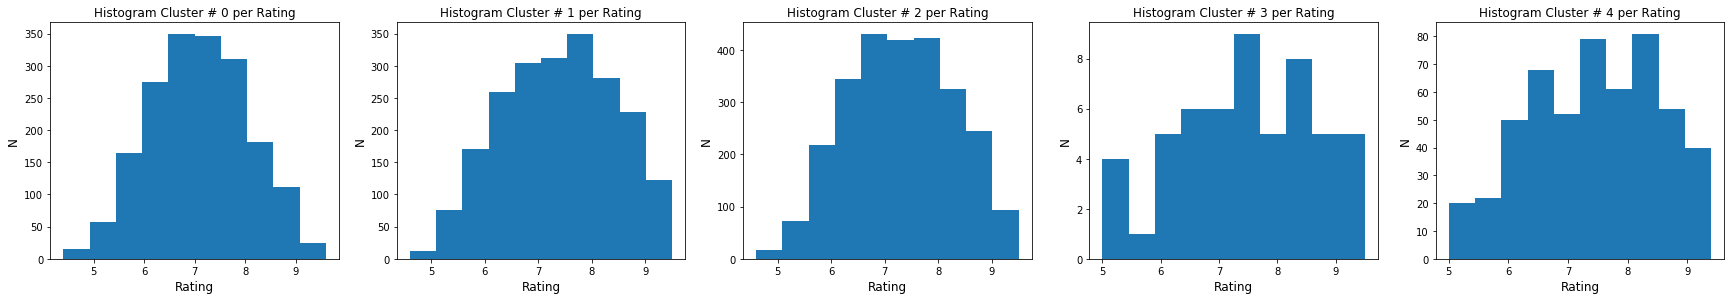

451
455


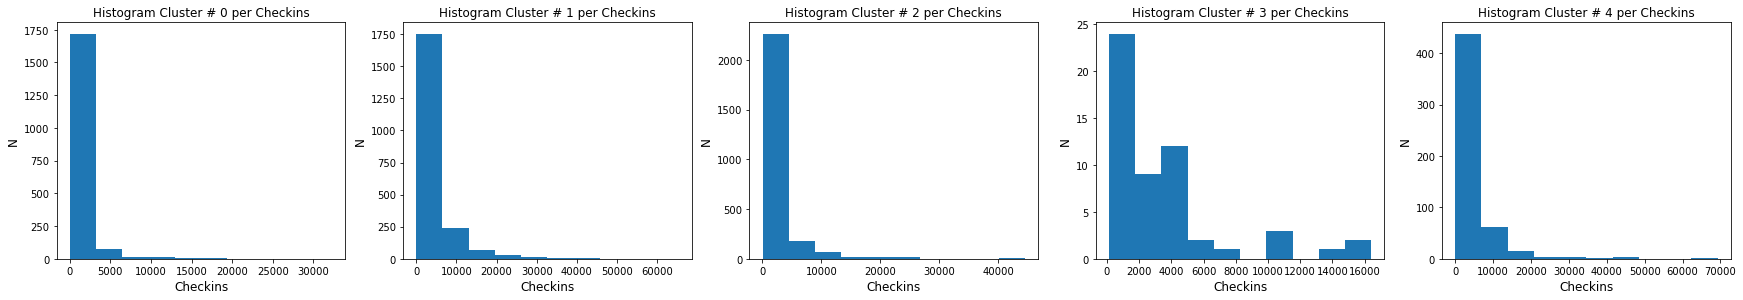

451
455


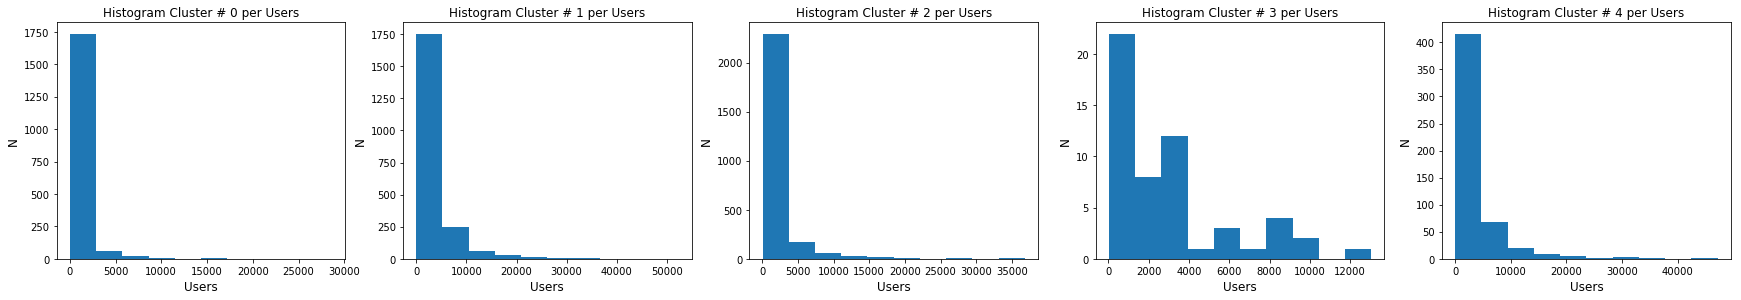

451
455


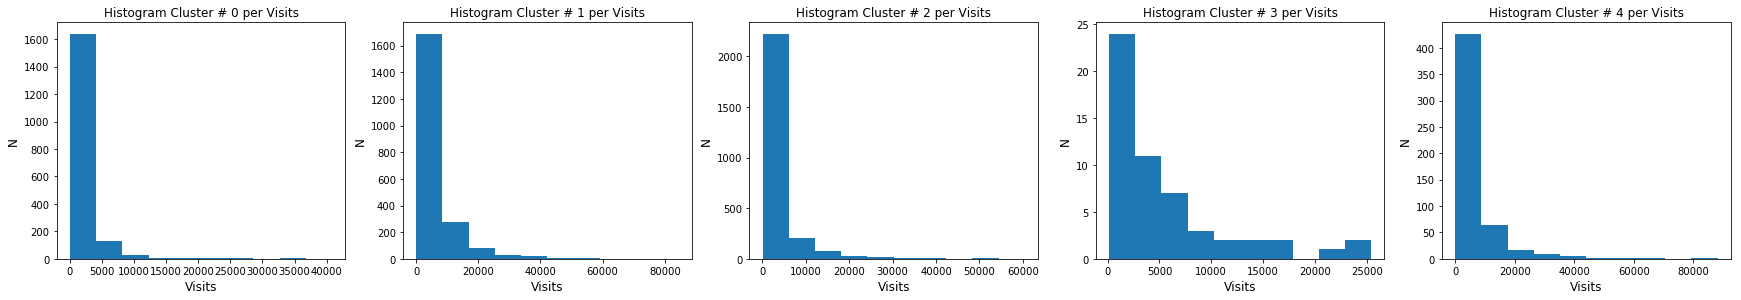

451
455


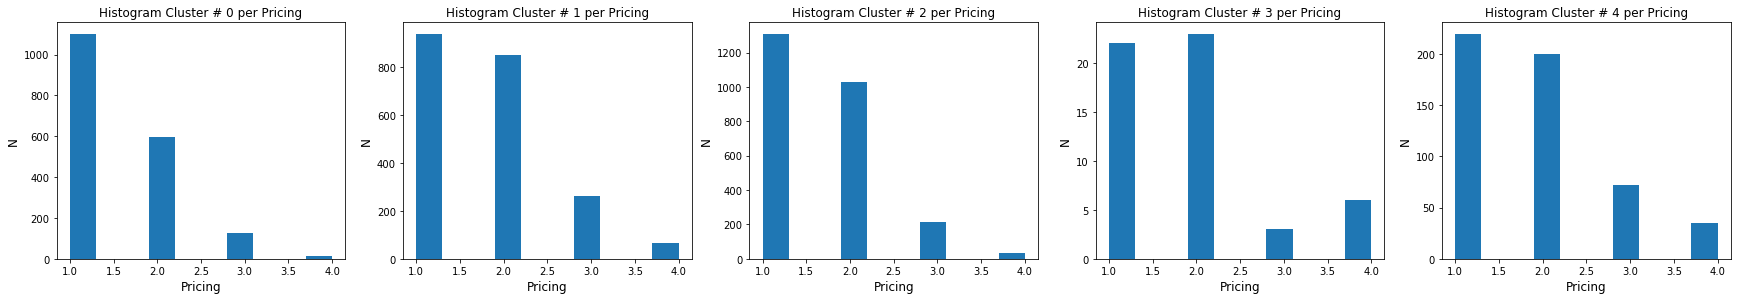

In [413]:
for i, column in enumerate(Foursquare.iloc[:,:5].columns):
    start = 451
    seq = 0
    print(start + seq)
    plt.subplot(start + seq)
    plt.title('Histogram Cluster # 0 per '+column)
    plt.ylabel('N', fontsize=12)
    plt.xlabel(column, fontsize=12)
    plt.hist(list(maps.loc[:,column][y == 0]))
    
    seq  += 1 
    plt.subplot(start + seq)
    plt.title('Histogram Cluster # 1 per '+column)
    plt.ylabel('N', fontsize=12)
    plt.xlabel(column, fontsize=12)
    plt.hist(list(maps.loc[:,column][y == 1]))
#     plt.Figure(figsize=(5,5))
    
    seq  += 1
    plt.subplot(start + seq)
    plt.title('Histogram Cluster # 2 per '+column)
    plt.ylabel('N', fontsize=12)
    plt.xlabel(column, fontsize=12)
    plt.hist(list(maps.loc[:,column][y == 2]))
#     plt.Figure(figsize=(5,5))
    
    seq  += 1 
    plt.subplot(start + seq)
    plt.title('Histogram Cluster # 3 per '+column)
    plt.ylabel('N', fontsize=12)
    plt.xlabel(column, fontsize=12)
    plt.hist(list(maps.loc[:,column][y == 3]))
#     plt.Figure(figsize=(5,5))
    
    seq  += 1 
    print(start + seq)
    plt.subplot(start + seq)
    plt.title('Histogram Cluster # 4 per '+column)
    plt.ylabel('N', fontsize=12)
    plt.xlabel(column, fontsize=12)
    plt.hist(list(maps.loc[:,column][y == 4]))
    plt.Figure(figsize=(5,1))
    plt.show()
    
#     plt.hist(list(maps.loc[:,column][y == 2]))
#     plt.hist(list(maps.loc[:,column][y == 3]))

#     plt.hist(list(maps.loc[:,column][y == 4]))

#     plt.hist(list(maps.loc[:,column][y == 5]))
    

In [414]:
Foursquare.iloc[:,5:8].columns

Index(['Type', 'Category', 'Class'], dtype='object')

In [417]:
pdmaps_0.head(2)

,id,Place Name,Rating,Checkins,Users,Visits,Pricing,Type,Category,Class
18,4b76b89ff964a520a05a2ee3,New York Diner,6.3,658.0,458.0,930.0,1.0,Burger Joint,Nutrition,Necessary
208,4c2bbc68b34ad13aad41eace,Garibaldi Mexican Restaurant,7.1,100.0,206.0,443.0,1.0,Mexican Restaurant,Social,Optional


In [423]:
# Normalized

,id,Place Name,Rating,Checkins,Users,Visits,Pricing,Type,Category
Class,,,,,,,,,
Necessary,0.288986,0.288986,0.288986,0.288986,0.288986,0.288986,0.288986,0.288986,0.288986
Optional,0.711014,0.711014,0.711014,0.711014,0.711014,0.711014,0.711014,0.711014,0.711014


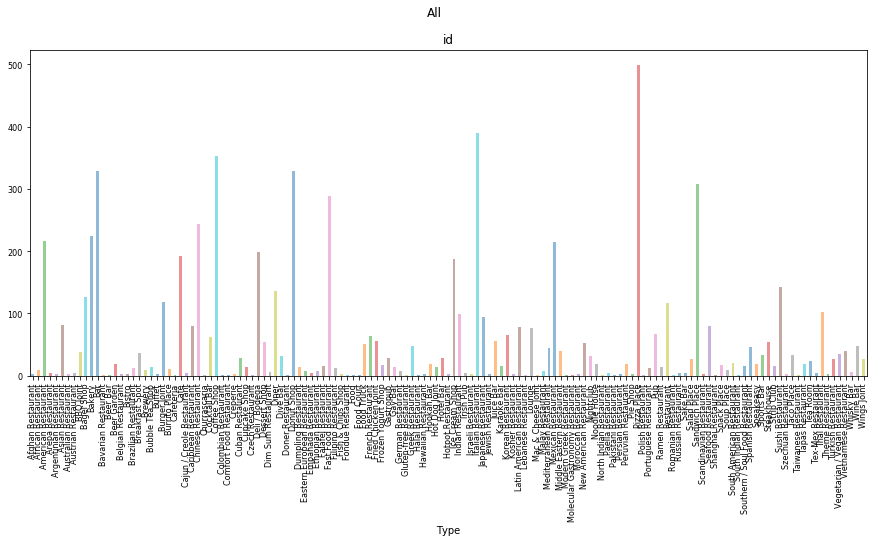

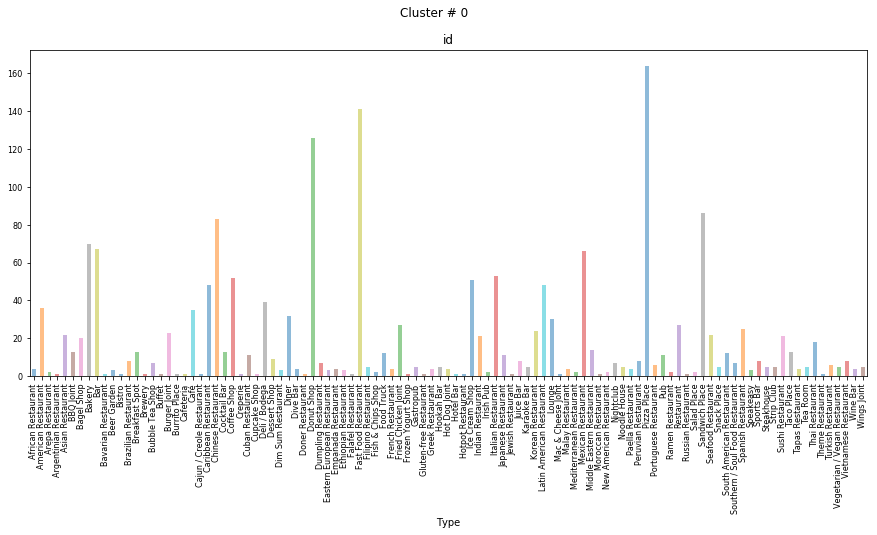

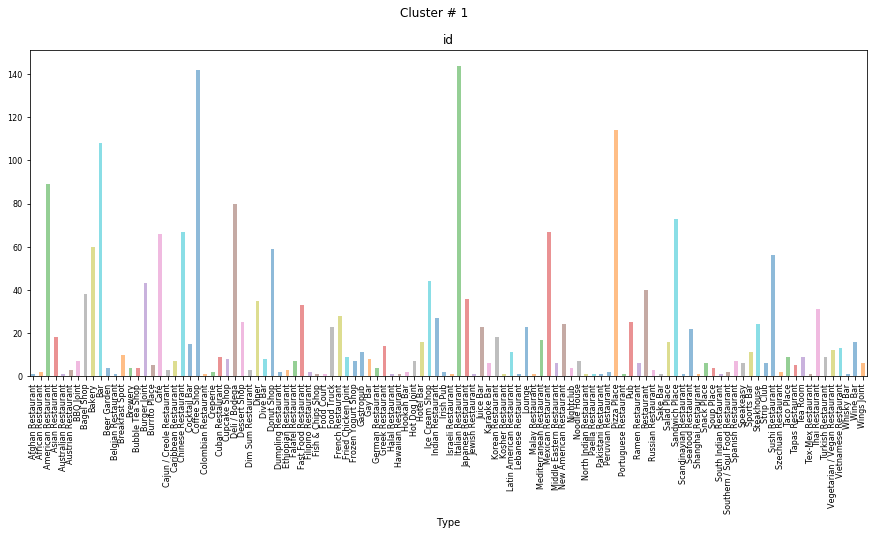

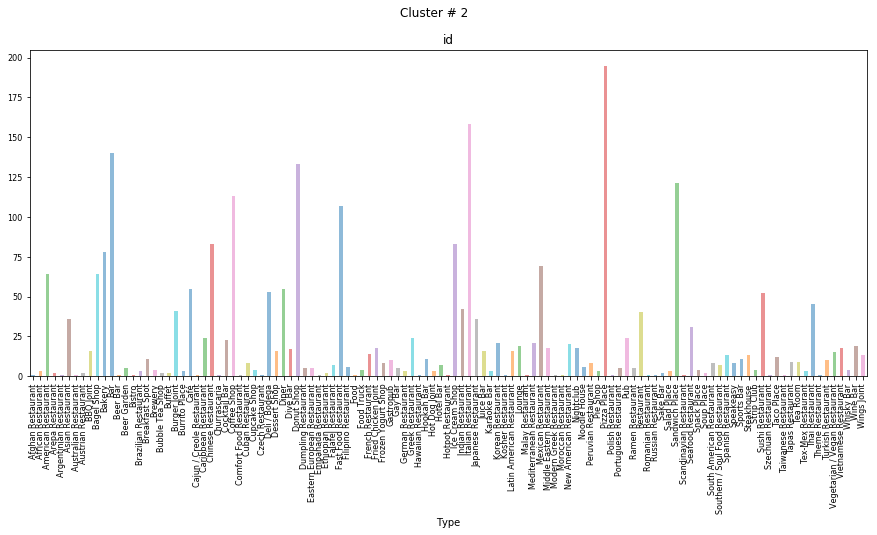

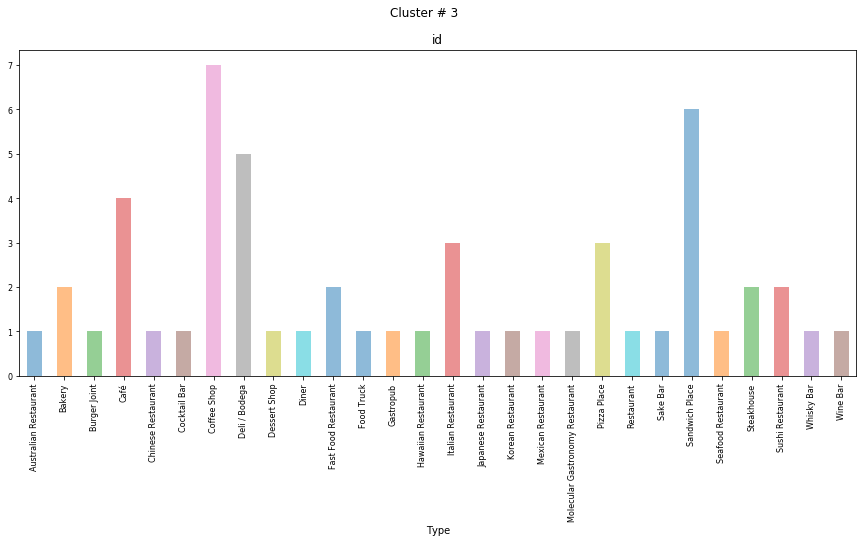

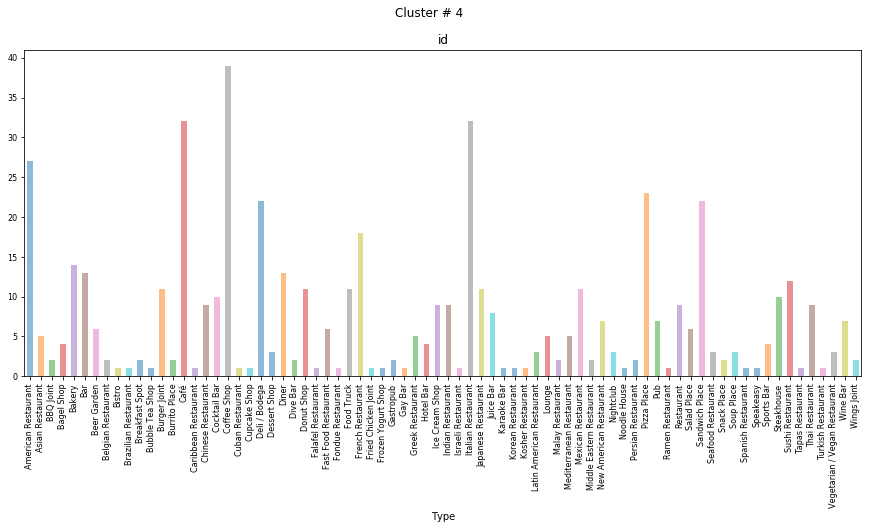

In [427]:

for i, column in enumerate(Foursquare.iloc[:,5:6].columns):  
    ax = pdmaps.groupby(by=column, axis=0).count().plot.bar(y = 'id', align='center',  alpha=0.5, subplots= True,
                                                           figsize=(15,6), title='All',legend=False, fontsize=8)
    ax = pdmaps_0.groupby(by=column, axis=0).count().plot.bar(y = 'id', align='center',  alpha=0.5, subplots= True,
                                                           figsize=(15,6), title='Cluster # 0',legend=False, fontsize=8)
    ax = pdmaps_1.groupby(by=column, axis=0).count().plot.bar(y = 'id', align='center',  alpha=0.5, subplots= True,
                                                           figsize=(15,6), title='Cluster # 1',legend=False, fontsize=8)

    ax = pdmaps_2.groupby(by=column, axis=0).count().plot.bar(y = 'id', align='center',  alpha=0.5, subplots= True,
                                                       figsize=(15,6), title='Cluster # 2',legend=False, fontsize=8)

    ax = pdmaps_3.groupby(by=column, axis=0).count().plot.bar(y = 'id', align='center',  alpha=0.5, subplots= True,
                                                   figsize=(15,6), title='Cluster # 3',legend=False, fontsize=8)

    ax = pdmaps_4.groupby(by=column, axis=0).count().plot.bar(y = 'id', align='center',  alpha=0.5, subplots= True,
                                               figsize=(15,6), title='Cluster # 4',legend=False, fontsize=8)


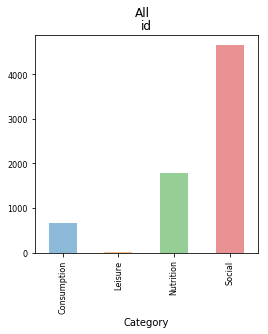

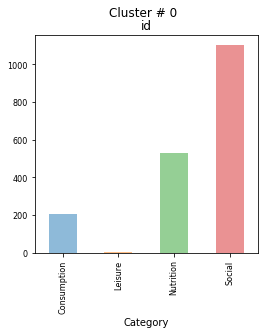

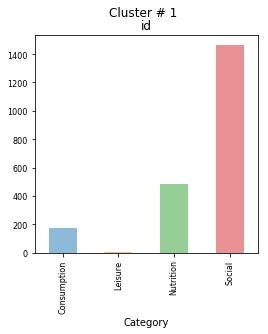

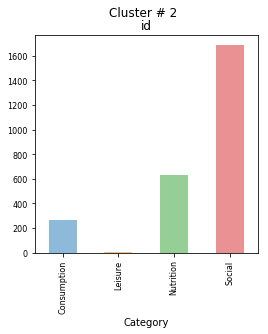

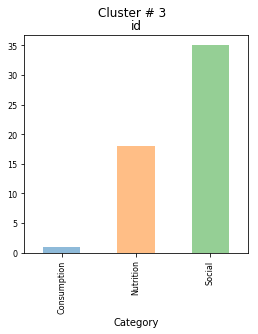

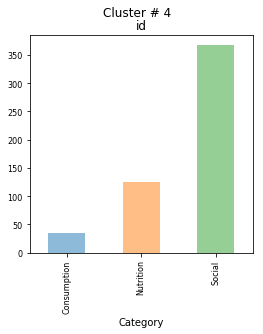

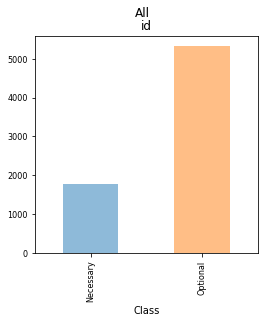

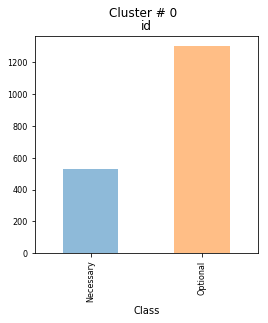

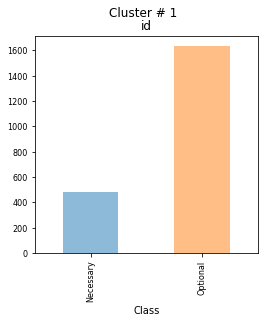

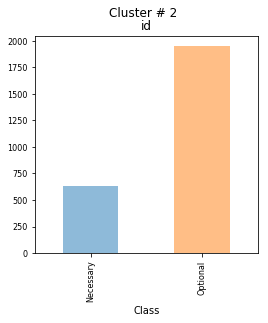

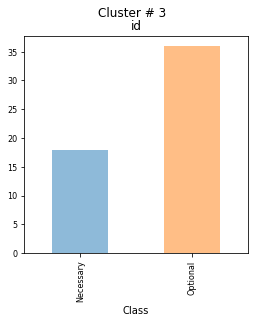

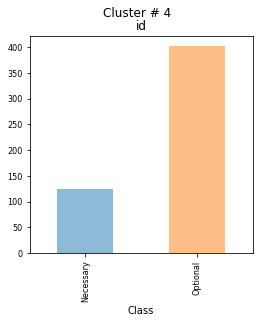

In [430]:

for i, column in enumerate(Foursquare.iloc[:,6:].columns):  
    ax = pdmaps.groupby(by=column, axis=0).count().plot.bar(y = 'id', align='center',  alpha=0.5, subplots= True,
                                                           figsize=(4,4), title='All',legend=False, fontsize=8)
    ax = pdmaps_0.groupby(by=column, axis=0).count().plot.bar(y = 'id', align='center',  alpha=0.5, subplots= True,
                                                           figsize=(4,4), title='Cluster # 0',legend=False, fontsize=8)
    ax = pdmaps_1.groupby(by=column, axis=0).count().plot.bar(y = 'id', align='center',  alpha=0.5, subplots= True,
                                                           figsize=(4,4), title='Cluster # 1',legend=False, fontsize=8)

    ax = pdmaps_2.groupby(by=column, axis=0).count().plot.bar(y = 'id', align='center',  alpha=0.5, subplots= True,
                                                       figsize=(4,4), title='Cluster # 2',legend=False, fontsize=8)

    ax = pdmaps_3.groupby(by=column, axis=0).count().plot.bar(y = 'id', align='center',  alpha=0.5, subplots= True,
                                                   figsize=(4,4), title='Cluster # 3',legend=False, fontsize=8)

    ax = pdmaps_4.groupby(by=column, axis=0).count().plot.bar(y = 'id', align='center',  alpha=0.5, subplots= True,
                                               figsize=(4,4), title='Cluster # 4',legend=False, fontsize=8)


In [431]:
# for i, column in enumerate(Foursquare.iloc[:,5:8].columns):  
#     ax = (pdmaps.groupby(by=column, axis=0).count()/pdmaps.groupby(by=column, axis=0).count().sum()[0]).plot.bar(y = 'id', align='center',  alpha=0.5, subplots= True,
#                                                            figsize=(15,6), title='All',legend=False, fontsize=8)
#     ax = (pdmaps_0.groupby(by=column, axis=0).count()/pdmaps_0.groupby(by=column, axis=0).count().sum()[0]).plot.bar(y = 'id', align='center',  alpha=0.5, subplots= True,
#                                                            figsize=(15,6), title='Cluster # 0',legend=False, fontsize=8)
#     ax = (pdmaps_1.groupby(by=column, axis=0).count()/pdmaps_1.groupby(by=column, axis=0).count().sum()[0]).plot.bar(y = 'id', align='center',  alpha=0.5, subplots= True,
#                                                            figsize=(15,6), title='Cluster # 1',legend=False, fontsize=8)

#     ax = (pdmaps_2.groupby(by=column, axis=0).count()/pdmaps_2.groupby(by=column, axis=0).count().sum()[0]).plot.bar(y = 'id', align='center',  alpha=0.5, subplots= True,
#                                                        figsize=(15,6), title='Cluster # 2',legend=False, fontsize=8)

#     ax = (pdmaps_3.groupby(by=column, axis=0).count()/pdmaps_3.groupby(by=column, axis=0).count().sum()[0]).plot.bar(y = 'id', align='center',  alpha=0.5, subplots= True,
#                                                    figsize=(15,6), title='Cluster # 3',legend=False, fontsize=8)

#     ax = (pdmaps_4.groupby(by=column, axis=0).count()/pdmaps_4.groupby(by=column, axis=0).count().sum()[0]).plot.bar(y = 'id', align='center',  alpha=0.5, subplots= True,
#                                                figsize=(15,6), title='Cluster # 4',legend=False, fontsize=8)


In [432]:
## Classification

In [433]:
#! pip install geopandas
#import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

%pylab inline

# To ignore some warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import os
import requests
import shapely
import json
from fiona.crs import from_epsg
import scipy as sp
from scipy import stats
#import geopy.distance
#from getCitiBikeCSV import getCitiBikeCSV # must have this function locally or in path
#pd.options.display.max_columns = None
DEVELOPING = False
#from get_jsonparsed_data import get_jsonparsed_data # must have this function locally or in path
#from evalChisq import evalChisq
seed = 100 

import geopandas as gpd
import pylab as pl
import io
import pylab as pl

from geopandas import GeoDataFrame
from geopandas.tools import sjoin
try:
    import ipywidgets as widgets
    hasWidgets = True
except ImportError:
    hasWidgets = False
%pylab inline


Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


In [434]:
maps.iloc[:,7:10].columns

Index(['Type', 'Category', 'Class'], dtype='object')

In [435]:
for column in maps.iloc[:,7:10].columns:
    print(column)
    maps[column] = pd.factorize(maps[column])[0]
maps.head(3)

Type
Category
Class


,id,Place Name,Rating,Checkins,Users,Visits,Pricing,Type,Category,Class,...,moe_doctor,per_col_16,pop90,per_col90,moe_hu16,hinc16,moe_hinc16,popgrowth,Type_1.19,geometry
0,3fd66200f964a5202bea1ee3,Bar Six,7.5,7129.0,4556.0,7886.0,2.0,0,0,0,...,103,0.772135,6241.0,0.594715,63,127904,11686,418.0,0,"POLYGON ((983477.0537245736 206553.0512004816,..."
1,3fd66200f964a520abe51ee3,Fiddlesticks Pub & Grill,6.1,23722.0,18806.0,28049.0,2.0,1,0,0,...,103,0.772135,6241.0,0.594715,63,127904,11686,418.0,0,"POLYGON ((983477.0537245736 206553.0512004816,..."
2,3fd66200f964a520d0e51ee3,Spain Restaurant,7.1,2095.0,2596.0,3949.0,1.0,2,0,0,...,103,0.772135,6241.0,0.594715,63,127904,11686,418.0,0,"POLYGON ((983477.0537245736 206553.0512004816,..."


Pearson product-moment correlation coefficient (PPMCC) : 0.315249356624


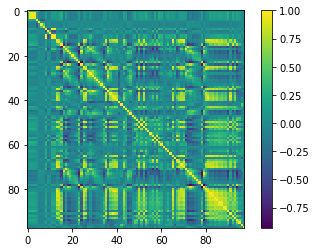

In [436]:
maps['Type_1.19'] = pd.factorize(maps['Type_1.19'])[0]
corrmatrix_Pearson = maps.corr()
Pearson = corrmatrix_Pearson.iloc[0][1]
# Cov_typologies_trans= cov(maps.iloc[:,'hinc16'],maps.iloc[:,6])

print('Pearson product-moment correlation coefficient (PPMCC) :',Pearson)
ax = plt.figure().add_subplot(111)

cax = ax.imshow(corrmatrix_Pearson, cmap='viridis')
plt.colorbar(cax)

In [454]:

corrmatrix_Pearson.head(10)

,Rating,Checkins,Users,Visits,Pricing,Type,Category,Class,GEOID,ALAND,...,doctorate,moe_doctor,per_col_16,pop90,per_col90,moe_hu16,hinc16,moe_hinc16,popgrowth,Type_1.19
Rating,1.000000,0.315249,0.349917,0.345547,0.254076,-0.049220,-0.174016,-0.156506,0.052363,-0.069289,...,0.064531,0.071047,0.159791,0.024933,0.104454,0.051755,0.109364,0.063794,-0.024319,-0.050625
Checkins,0.315249,1.000000,0.950848,0.977542,0.143347,-0.067209,-0.092857,-0.059476,0.144069,-0.089556,...,0.136728,0.148369,0.297162,0.018201,0.232946,0.089328,0.207884,0.148302,0.019262,-0.056868
Users,0.349917,0.950848,1.000000,0.965904,0.193960,-0.062266,-0.107568,-0.068521,0.170776,-0.104062,...,0.147912,0.160404,0.305473,0.020799,0.241770,0.096296,0.217109,0.160587,0.019998,-0.047179
Visits,0.345547,0.977542,0.965904,1.000000,0.135853,-0.069260,-0.084616,-0.050734,0.148226,-0.095258,...,0.136503,0.144775,0.289539,0.010419,0.227182,0.083440,0.207530,0.151130,0.025612,-0.045159
Pricing,0.254076,0.143347,0.193960,0.135853,1.000000,-0.010011,-0.408232,-0.327981,0.044704,-0.048272,...,0.102581,0.111059,0.192925,0.014145,0.155856,0.099296,0.166794,0.117497,-0.002726,-0.020048
Type,-0.049220,-0.067209,-0.062266,-0.069260,-0.010011,1.000000,0.170613,0.039538,-0.050495,0.030265,...,-0.044046,-0.050240,-0.079677,-0.026791,-0.063632,-0.033535,-0.056855,-0.044367,0.015843,0.034841
Category,-0.174016,-0.092857,-0.107568,-0.084616,-0.408232,0.170613,1.000000,0.483009,-0.066358,0.049062,...,-0.052571,-0.067252,-0.123119,-0.011538,-0.080511,-0.047373,-0.073833,-0.053314,0.010554,0.003115
Class,-0.156506,-0.059476,-0.068521,-0.050734,-0.327981,0.039538,0.483009,1.000000,-0.035066,0.029334,...,-0.030935,-0.044426,-0.076074,-0.020191,-0.046945,-0.047407,-0.043196,-0.013025,0.021440,0.017933
GEOID,0.052363,0.144069,0.170776,0.148226,0.044704,-0.050495,-0.066358,-0.035066,1.000000,-0.476784,...,0.145590,0.170952,0.237095,0.050760,0.203800,-0.000522,0.062451,0.141393,-0.064035,0.085618
ALAND,-0.069289,-0.089556,-0.104062,-0.095258,-0.048272,0.030265,0.049062,0.029334,-0.476784,1.000000,...,-0.088844,-0.078835,-0.170622,0.062968,-0.110322,0.075400,0.014292,-0.059371,0.056152,-0.038186


In [469]:
corrmatrix_Pearson.iloc[:7,8:]

,GEOID,ALAND,AWATER,geo,GEOid2,hh16,moe_hh16,per_col00,per_nonwhi,per_rent00,...,doctorate,moe_doctor,per_col_16,pop90,per_col90,moe_hu16,hinc16,moe_hinc16,popgrowth,Type_1.19
Rating,0.052363,-0.069289,-0.018774,0.052363,0.052363,0.057683,0.072950,0.126594,-0.096491,0.061759,...,0.064531,0.071047,0.159791,0.024933,0.104454,0.051755,0.109364,0.063794,-0.024319,-0.050625
Checkins,0.144069,-0.089556,-0.036360,0.144069,0.144069,0.117656,0.169838,0.269770,-0.139407,0.136849,...,0.136728,0.148369,0.297162,0.018201,0.232946,0.089328,0.207884,0.148302,0.019262,-0.056868
Users,0.170776,-0.104062,-0.038447,0.170776,0.170776,0.125252,0.186155,0.278799,-0.131421,0.155912,...,0.147912,0.160404,0.305473,0.020799,0.241770,0.096296,0.217109,0.160587,0.019998,-0.047179
Visits,0.148226,-0.095258,-0.038044,0.148226,0.148226,0.108568,0.162076,0.261166,-0.127082,0.135892,...,0.136503,0.144775,0.289539,0.010419,0.227182,0.083440,0.207530,0.151130,0.025612,-0.045159
Pricing,0.044704,-0.048272,0.002106,0.044704,0.044704,0.075068,0.127183,0.187257,-0.139989,0.025999,...,0.102581,0.111059,0.192925,0.014145,0.155856,0.099296,0.166794,0.117497,-0.002726,-0.020048
Type,-0.050495,0.030265,0.022709,-0.050495,-0.050495,-0.038250,-0.047605,-0.061783,0.050125,-0.029147,...,-0.044046,-0.050240,-0.079677,-0.026791,-0.063632,-0.033535,-0.056855,-0.044367,0.015843,0.034841
Category,-0.066358,0.049062,0.012699,-0.066358,-0.066358,-0.048768,-0.071214,-0.097391,0.043565,-0.085043,...,-0.052571,-0.067252,-0.123119,-0.011538,-0.080511,-0.047373,-0.073833,-0.053314,0.010554,0.003115


In [509]:
corrmatrix_Pearson.iloc[:5,8:]

,GEOID,ALAND,AWATER,geo,GEOid2,hh16,moe_hh16,per_col00,per_nonwhi,per_rent00,...,doctorate,moe_doctor,per_col_16,pop90,per_col90,moe_hu16,hinc16,moe_hinc16,popgrowth,Type_1.19
Rating,0.052363,-0.069289,-0.018774,0.052363,0.052363,0.057683,0.072950,0.126594,-0.096491,0.061759,...,0.064531,0.071047,0.159791,0.024933,0.104454,0.051755,0.109364,0.063794,-0.024319,-0.050625
Checkins,0.144069,-0.089556,-0.036360,0.144069,0.144069,0.117656,0.169838,0.269770,-0.139407,0.136849,...,0.136728,0.148369,0.297162,0.018201,0.232946,0.089328,0.207884,0.148302,0.019262,-0.056868
Users,0.170776,-0.104062,-0.038447,0.170776,0.170776,0.125252,0.186155,0.278799,-0.131421,0.155912,...,0.147912,0.160404,0.305473,0.020799,0.241770,0.096296,0.217109,0.160587,0.019998,-0.047179
Visits,0.148226,-0.095258,-0.038044,0.148226,0.148226,0.108568,0.162076,0.261166,-0.127082,0.135892,...,0.136503,0.144775,0.289539,0.010419,0.227182,0.083440,0.207530,0.151130,0.025612,-0.045159
Pricing,0.044704,-0.048272,0.002106,0.044704,0.044704,0.075068,0.127183,0.187257,-0.139989,0.025999,...,0.102581,0.111059,0.192925,0.014145,0.155856,0.099296,0.166794,0.117497,-0.002726,-0.020048


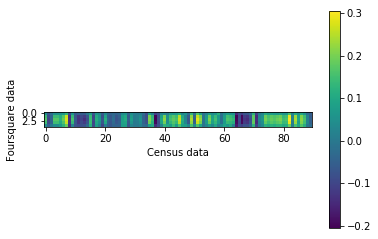

In [517]:
ax = plt.figure().add_subplot(111)
plt.ylabel('Foursquare data')
plt.xlabel('Census data')

cax = ax.imshow(corrmatrix_Pearson.iloc[:5,8:], cmap='viridis')
cmap='viridis')
plt.colorbar(cax)

In [506]:
corrmatrix_Pearson.iloc[5:6,8:].max().sort_values()

per_col_16   -0.079677
mhval16      -0.078337
moe_profes   -0.063700
per_col90    -0.063632
vhi2016      -0.062709
per_col00    -0.061783
profession   -0.058593
mhval00      -0.056866
hinc16       -0.056855
bachelors    -0.054912
vhi2000      -0.054394
masters      -0.052930
vhi1990      -0.052765
moe_master   -0.052157
mrent16      -0.051166
GEOid2       -0.050495
geo          -0.050495
GEOID        -0.050495
moe_doctor   -0.050240
rou90        -0.048980
moe_hh16     -0.047605
rou00        -0.046837
moe_bachel   -0.045631
hu16         -0.044397
moe_hinc16   -0.044367
doctorate    -0.044046
rhu16        -0.042900
denominato   -0.041872
hh00         -0.041406
moe_mhval1   -0.040883
                ...   
mhval90_00   -0.002031
ohu90         0.001942
hi1990        0.002771
hmi1990       0.008328
ch_all_li_    0.009277
li1990        0.013903
hi2016        0.014621
popgrowth     0.015843
vli2000       0.021503
hi2000        0.022250
AWATER        0.022709
per_all__1    0.025043
vli1990    

In [501]:
corrmatrix_Pearson.iloc[:8,8:].min().sort_values()

per_limove   -0.205256
per_nonw_2   -0.201129
li2016       -0.194601
per_all__2   -0.142024
hmi2016      -0.140908
per_nonwhi   -0.139989
hmi2000      -0.135686
li2000       -0.130821
mi2016       -0.123552
per_col_16   -0.123119
ALAND        -0.104062
mi2000       -0.099877
per_all_li   -0.099189
mhval16      -0.098155
per_col00    -0.097391
per_nonw_1   -0.095534
vli2016      -0.094405
mrent16      -0.091328
per_limo_1   -0.088548
per_rent00   -0.085043
ch_all_li1   -0.082611
per_col90    -0.080511
hi2000       -0.080096
bachelors    -0.079740
hi2016       -0.079512
mrent90_00   -0.078595
moe_profes   -0.078526
hmi1990      -0.076824
mhval00      -0.076236
per_rent16   -0.075793
                ...   
vhi1990      -0.052765
doctorate    -0.052571
mrent00_16   -0.051731
ohu00        -0.049494
hh16         -0.048768
per_units_   -0.048429
moe_hu16     -0.047407
hh00         -0.047036
co_med_ind   -0.045065
denominato   -0.044759
mhval00_16   -0.044103
moe_owner1   -0.042968
ch_all_li_ 

In [492]:
cols = ['mrent90_00','moveinincd','hinc16','empd15','moe_mhval1','mhval00','per_col90','mrent16','per_col00','mhval16']

corrmatrix_Pearson[cols].iloc[:8,:]
# Users
# Users

,mrent90_00,moveinincd,hinc16,empd15,moe_mhval1,mhval00,per_col90,mrent16,per_col00,mhval16
Rating,0.082819,0.086362,0.109364,0.033103,0.093280,0.132086,0.104454,0.112387,0.126594,0.164017
Checkins,0.186013,0.203225,0.207884,0.201954,0.204765,0.220787,0.232946,0.252149,0.269770,0.262876
Users,0.205524,0.209466,0.217109,0.217783,0.220595,0.241588,0.241770,0.265609,0.278799,0.286439
Visits,0.180805,0.192842,0.207530,0.191793,0.199539,0.221605,0.227182,0.248251,0.261166,0.264849
Pricing,0.081321,0.082498,0.166794,0.127518,0.100984,0.158200,0.155856,0.159932,0.187257,0.164967
Type,-0.037788,-0.040713,-0.056855,-0.035241,-0.040883,-0.056866,-0.063632,-0.051166,-0.061783,-0.078337
Category,-0.078595,-0.062846,-0.073833,-0.063817,-0.070090,-0.076236,-0.080511,-0.091328,-0.097391,-0.098155
Class,-0.034263,-0.050676,-0.043196,-0.013112,-0.038583,-0.041806,-0.046945,-0.049324,-0.060794,-0.054998


In [494]:
corrmatrix_Pearson.iloc[:7,8:].transpose().describe()

,Rating,Checkins,Users,Visits,Pricing,Type,Category
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.021857,0.055237,0.061327,0.052921,0.032844,-0.014898,-0.024078
std,0.067991,0.122282,0.128591,0.119678,0.085037,0.038507,0.047790
min,-0.144224,-0.201129,-0.205256,-0.195057,-0.169270,-0.079677,-0.123119
25%,-0.030349,-0.057086,-0.055433,-0.055093,-0.034899,-0.045323,-0.066358
50%,0.035095,0.076040,0.082794,0.072059,0.036088,-0.025376,-0.032660
75%,0.071693,0.148181,0.164656,0.147631,0.102182,0.015537,0.017796
max,0.164017,0.297162,0.305473,0.289539,0.192925,0.079505,0.088201


In [465]:
corrmatrix_Pearson.iloc[:7,8:].max().idxmax()

'per_col_16'

In [467]:
corrmatrix_Pearson.iloc[:7,8:].idxmax().max()

'Visits'

In [438]:
Cov_typologies_trans = cov(maps['hinc16'],maps.iloc[:,6])
print('Covariance is:', Cov_typologies_trans[0][1])


Covariance is: 4760.1916592


In [439]:
corrmatrix_Pearson['hinc16']

Rating        0.109364
Checkins      0.207884
Users         0.217109
Visits        0.207530
Pricing       0.166794
Type         -0.056855
Category     -0.073833
Class        -0.043196
GEOID         0.062451
ALAND         0.014292
AWATER        0.025146
geo           0.062451
GEOid2        0.062451
hh16          0.131563
moe_hh16      0.279648
per_col00     0.761222
per_nonwhi   -0.597771
per_rent00   -0.222375
vli2000      -0.607322
li2000       -0.539284
mi2000       -0.264313
hmi2000      -0.220471
hi2000       -0.034125
vhi2000       0.739101
per_all_li   -0.673033
hh00          0.076604
all_li_cou   -0.299522
per_nonw_1   -0.446748
per_rent90   -0.204932
vli1990      -0.464255
                ...   
moe_owner1    0.248466
rhu16        -0.010357
moe_renter    0.190042
per_rent16   -0.281501
per_nonw_2   -0.670247
vli2016      -0.710987
li2016       -0.636320
mi2016       -0.421492
hmi2016      -0.286349
hi2016       -0.054694
vhi2016       0.839621
per_all__2   -0.794541
all_li_c_2 

In [440]:
corrmatrix_Pearson['hinc16'].iloc[corrmatrix_Pearson['hinc16'].index != 'hinc16'].idxmax()

'vhi2016'

In [441]:
X.columns

Index(['moveinincd', 'mrent90', 'mrent00', 'mrent16', 'moe_mrent1',
       'mrent90_00', 'mrent00_16', 'hinc16', 'moe_hinc16'],
      dtype='object')

In [442]:
corrmatrix_Pearson['hinc16'].iloc[:9]

Rating      0.109364
Checkins    0.207884
Users       0.217109
Visits      0.207530
Pricing     0.166794
Type       -0.056855
Category   -0.073833
Class      -0.043196
GEOID       0.062451
Name: hinc16, dtype: float64

In [443]:
corrmatrix_Pearson['Type_1.19'].iloc[:9]

Rating     -0.050625
Checkins   -0.056868
Users      -0.047179
Visits     -0.045159
Pricing    -0.020048
Type        0.034841
Category    0.003115
Class       0.017933
GEOID       0.085618
Name: Type_1.19, dtype: float64

In [97]:
# Lets see filtered by cluster!

Pearson product-moment correlation coefficient (PPMCC) : 0.333344348558


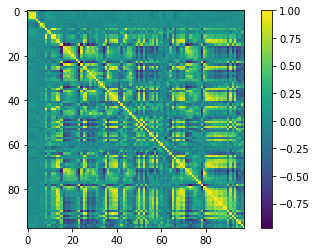

In [98]:
corrmatrix_Pearson = maps[y==0].corr()
Pearson = corrmatrix_Pearson.iloc[0][1]
# Cov_typologies_trans= cov(maps.iloc[:,'hinc16'],maps.iloc[:,6])

print('Pearson product-moment correlation coefficient (PPMCC) :',Pearson)
ax = plt.figure().add_subplot(111)

cax = ax.imshow(corrmatrix_Pearson, cmap='viridis')
plt.colorbar(cax)

In [99]:
corrmatrix_Pearson['hinc16'].iloc[:9]

Rating     -0.002388
Checkins    0.032311
Users       0.043274
Visits      0.042030
Pricing     0.011410
Type        0.022310
Category    0.025949
Class       0.042469
GEOID      -0.072402
Name: hinc16, dtype: float64

In [100]:
corrmatrix_Pearson['Type_1.19'].iloc[:9]

Rating     -0.021536
Checkins    0.021694
Users       0.031714
Visits      0.030915
Pricing     0.039082
Type        0.000097
Category   -0.021858
Class      -0.008355
GEOID      -0.022600
Name: Type_1.19, dtype: float64

Pearson product-moment correlation coefficient (PPMCC) : 0.225226183453


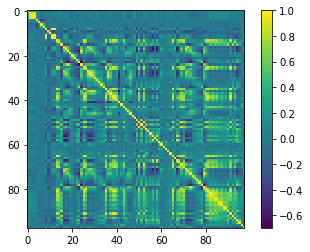

In [101]:
corrmatrix_Pearson = maps[y==1].corr()
Pearson = corrmatrix_Pearson.iloc[0][1]
# Cov_typologies_trans= cov(maps.iloc[:,'hinc16'],maps.iloc[:,6])

print('Pearson product-moment correlation coefficient (PPMCC) :',Pearson)
ax = plt.figure().add_subplot(111)

cax = ax.imshow(corrmatrix_Pearson, cmap='viridis')
plt.colorbar(cax)

In [102]:
corrmatrix_Pearson['hinc16'].iloc[:9]

Rating      0.119197
Checkins    0.085844
Users       0.015416
Visits      0.069822
Pricing     0.072570
Type       -0.013004
Category   -0.015121
Class      -0.054530
GEOID      -0.318441
Name: hinc16, dtype: float64

In [103]:
corrmatrix_Pearson['Type_1.19'].iloc[:9]

Rating      0.001351
Checkins   -0.011165
Users       0.025760
Visits      0.006603
Pricing    -0.024611
Type        0.013424
Category   -0.019554
Class       0.005333
GEOID       0.258368
Name: Type_1.19, dtype: float64

Pearson product-moment correlation coefficient (PPMCC) : 0.322343138893


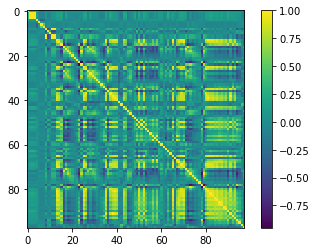

In [104]:
corrmatrix_Pearson = maps[y==2].corr()
Pearson = corrmatrix_Pearson.iloc[0][1]
# Cov_typologies_trans= cov(maps.iloc[:,'hinc16'],maps.iloc[:,6])

print('Pearson product-moment correlation coefficient (PPMCC) :',Pearson)
ax = plt.figure().add_subplot(111)

cax = ax.imshow(corrmatrix_Pearson, cmap='viridis')
plt.colorbar(cax)

In [105]:
corrmatrix_Pearson['hinc16'].iloc[:9]

Rating      0.033630
Checkins    0.071774
Users       0.066990
Visits      0.067889
Pricing     0.103027
Type       -0.001719
Category   -0.021755
Class      -0.007543
GEOID      -0.462475
Name: hinc16, dtype: float64

In [106]:

corrmatrix_Pearson['Type_1.19'].iloc[:9]

Rating     -0.103443
Checkins   -0.131050
Users      -0.135794
Visits     -0.119659
Pricing    -0.068054
Type        0.064871
Category    0.037151
Class       0.030218
GEOID      -0.128182
Name: Type_1.19, dtype: float64

In [107]:
for i in range(5):
    maps[y==0]['Type_1.19']

In [108]:
maps[y==1]['Type_1.19']

117     4
118     4
119     4
120     4
121     4
122     4
123     4
124     4
125     4
126     4
127     4
128     4
129     4
130     4
131     4
208     5
229     2
230     2
280     1
281     1
282     1
318     1
319     1
429     4
430     4
431     4
432     4
433     4
434     4
435     4
       ..
7391    8
7392    0
7393    3
7394    0
7395    1
7397    1
7398    9
7399    5
7403    3
7404    0
7405    3
7406    3
7407    3
7408    3
7412    9
7414    2
7415    5
7416    2
7417    5
7418    1
7419    8
7420    0
7421    1
7422    1
7423    2
7424    5
7427    3
7428    0
7429    8
7430    4
Name: Type_1.19, Length: 3136, dtype: int64

In [109]:
maps['clusters'] =y

In [110]:
maps['clusters'].unique()

array([2, 3, 1, 0, 4, 5])

In [111]:
maps.tail()

,id,Place Name,Rating,Checkins,Users,Visits,Pricing,Type,Category,Class,...,per_col_16,pop90,per_col90,moe_hu16,hinc16,moe_hinc16,popgrowth,Type_1.19,geometry,clusters
7426,4cbb758f9552b60c7b32e08b,Glatt A La Carte,7.0,192.0,230.0,502.0,4.0,12,0,0,...,0.240085,2658.000000,0.186529,38,54263,5220,-198.000000,5,"POLYGON ((987786.5785972978 168567.6318460018,...",2
7427,4cd8a01d7d454688d8bdeced,Liquor World,5.3,231.0,102.0,251.0,2.0,86,3,0,...,0.281752,1651.000000,0.133178,32,63000,20424,-40.000000,3,"POLYGON ((1013842.951511152 171410.011386449, ...",1
7428,4c61ca6858810f47a7af051e,White Castle,7.6,566.0,902.0,1993.0,1.0,30,1,1,...,0.171865,2871.936516,0.135587,40,60057,15711,-622.550230,0,"POLYGON ((920818.6166440968 211311.3917694355,...",1
7429,4d5ff8735b276dcb55320fc6,Carvel Ice Cream,7.1,128.0,62.0,136.0,1.0,29,2,0,...,0.164927,1847.585004,0.065118,42,45031,6135,-13.059973,8,"POLYGON ((933141.6481898339 221612.2658055118,...",1
7430,4f997b47d4f21823bb1f4c70,Baskin-Robbins,7.0,40.0,10.0,40.0,1.0,29,2,0,...,0.440000,104.443092,0.000000,15,0,0,-41.457771,4,"POLYGON ((1023921.099531741 186868.9762711787,...",1


In [112]:
maps.to_csv('clusters')